# Практическое задание к модулю Python-13
## Загрузка данных и предварительная подготовка

In [256]:
import pandas as pd

# Загружаем данные
churn = pd.read_csv('data/churn.csv')

# Делаем копию, чтобы не менять исходный файл
churn_cp = churn.copy()
churn_cp.head()

# Удаляем лишний столбец RowNumber
churn_cp = churn_cp.drop(['RowNumber'], axis=1)
churn_cp.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Задание 9.1
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.
### Решение

([<matplotlib.patches.Wedge at 0x2f192444340>,
 [Text(-0.962556155622219, 0.7165791284106557, 'Loyal'),
  Text(0.8823431426537006, -0.6568642010431012, 'Exited')],
 [Text(-0.5614910907796277, 0.41800449157288244, '79.6%'),
  Text(0.4812780778111093, -0.35828956420532787, '20.4%')])

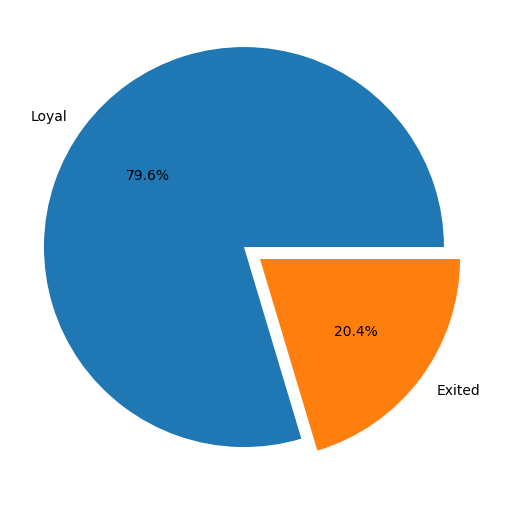

In [257]:
# Подготовим данные
churn_cp['ExitedCat'] = churn_cp['Exited'].apply(lambda x: 'Loyal' if x == 0 else 'Exited')
clients_exited = churn_cp['ExitedCat'].value_counts()

# Для демонстрации соотношения лояльных и ушедших клиентов используем круговую диаграмму
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(5,5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    clients_exited,
    labels=clients_exited.index,
    autopct='%.1f%%', # формат
    explode = [0.1, 0] 
)

### Ответ
Соотношение ушедших и лояльных клиентов составляет примерно 1 к 5 ( на одного ушедшего клиента приходится 5 лояльных): 
процент лояльных клиентов: 79,6%
процент ушедших клиентов: 20,4%.


## Задание 9.2
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

### Решение

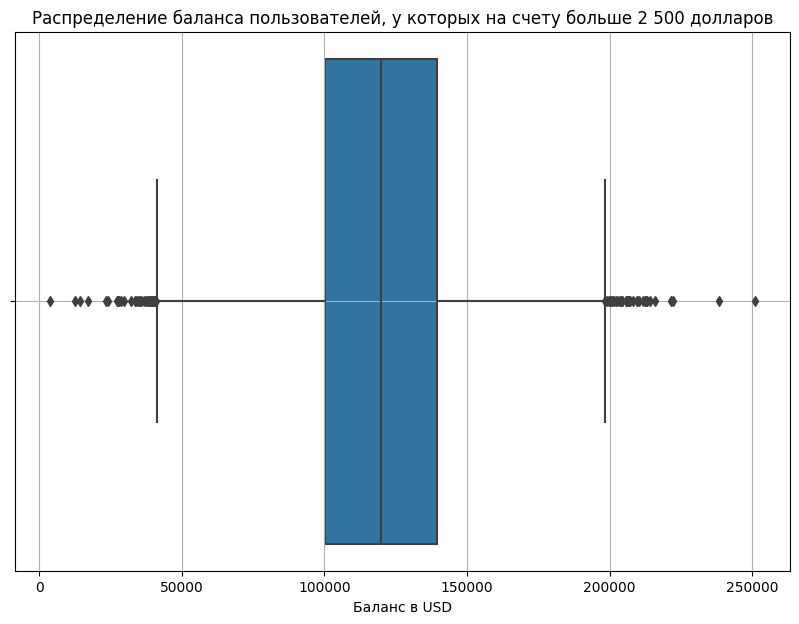

In [258]:
# Отфильтруем данные, оставив только тех клиентов, у которых на счету больше 2 500 долларов
croped_churn_cp = churn_cp[churn_cp['Balance'] > 2500]

# Построим коробчатую диаграмму
import seaborn as sns 
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_churn_cp,
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение баланса пользователей, у которых на счету больше 2 500 долларов');
boxplot.set_xlabel('Баланс в USD');
boxplot.grid() 


### Ответ
За исключением клиентов, имеющих на счету меньше 2 500 USD на счете, распределение баланса клиентов в целом соответствует нормальному распределению.

Границы распределения находятся между 40 000 USD и 190 000 USD. При этом имеются аномальные выбросы за границами распределения, как слева, так и справа.

Медианный размер счета составляет 120 000 USD. 
25% квантиль приходится на размер счета = 100 000 USD
75% квантиль - на размер счета = 140 000 USD
Соответственно, межквантильный размах составляет 40 000 USD.

## Задание 9.3
Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

### Решение

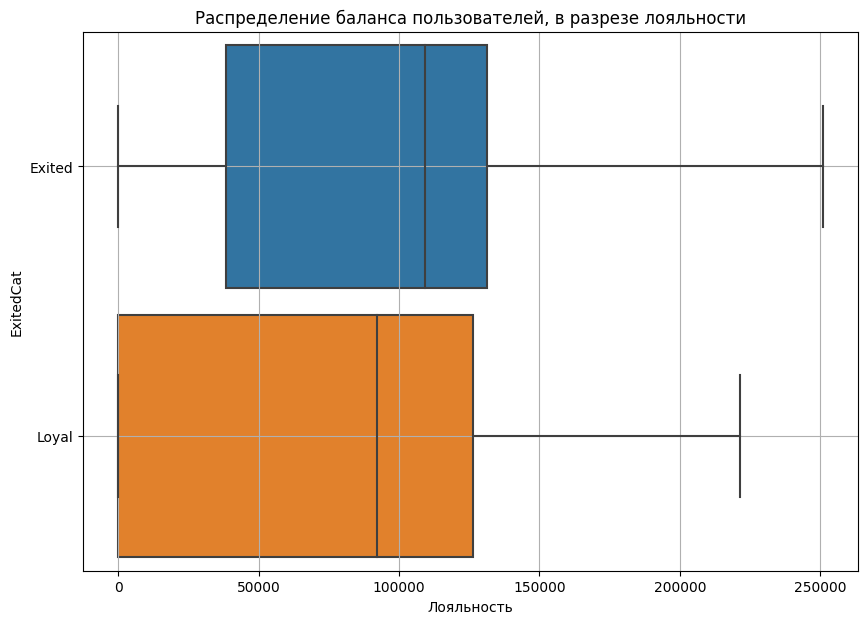

In [259]:
# Построим коробчатую диаграмму распределения баланса в разрезе признака оттока
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_cp,
    x='Balance',
    y='ExitedCat',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение баланса пользователей, в разрезе лояльности');
boxplot.set_xlabel('Баланс в USD');
boxplot.set_xlabel('Лояльность');
boxplot.grid()

### Ответ
Как видно на диаграммах выше, распределение величины баланса лояльных и ушедших клиентов отличаются. Медианна величина баланса ушедших клиентов выше, чем у лояльных. А также, заметно, что верхняя граница распределения у ушедших клиентов также превышает аналогичную границу лояльных.

Также, среди лояльных нижняя 25% квантиль совпадает с нижней границей распределения. Т.е. в основном среди лояльных клиентов преобладают не крупные клиенты с небольшими суммами на балансе.


Из этого можно сделать вывод, что чаще уходят крупные клиенты с большими суммами на балансе. Возможно, система комиссий или начислений банка менее выгодна таким клиентам. В качестве меры по удержанию клиентов можно попробовать предоставить более выгодные условия для клиентов с крупными вкладами.

## Задание 9.4

Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

### Решение

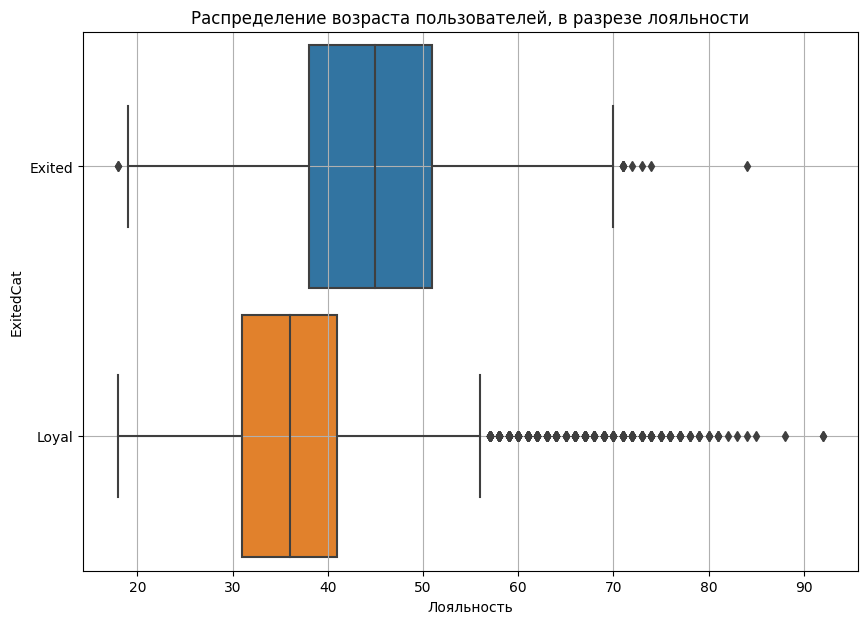

In [260]:
# Построим коробчатую диаграмму
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_cp,
    x='Age',
    y='ExitedCat',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение возраста пользователей, в разрезе лояльности');
boxplot.set_xlabel('Возраст');
boxplot.set_xlabel('Лояльность');
boxplot.grid()

### Ответ
Чаще аномальные выбросы в распределении по возрасту клиентов наблюдаются среди лояльных клиентов. Причем данные выбросы находятся за правой границей распределения, начиная примерно с возраста 55+. 

При этом границы распределения возраста среди лояльных клиенов уже, чем у ушедших, а также медианный возраст у лояльных клиентов меньше, чем у ушедних.
У лояльных клиентов медианным является возраст 35 лет, межквартильный размах приходится на промежуток между 31 до 42 годами. границы распределения находятся на промежутке между 16 и 56 годами.
Тогда как у ушедших клиентов медианный возраст составляет 45 лет. межквартильных размах находится на промежутке между 38 и 55 годами. границы распределения от 16 до 70 лет.

Следовательно Банку предлагается обратить внимание на возрастную категорию от 38 до 55 лет. Так как именно на эту категорию приходится максимальное сосредоточение ушедших клиентов.



## Задание 9.5
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

### Решение

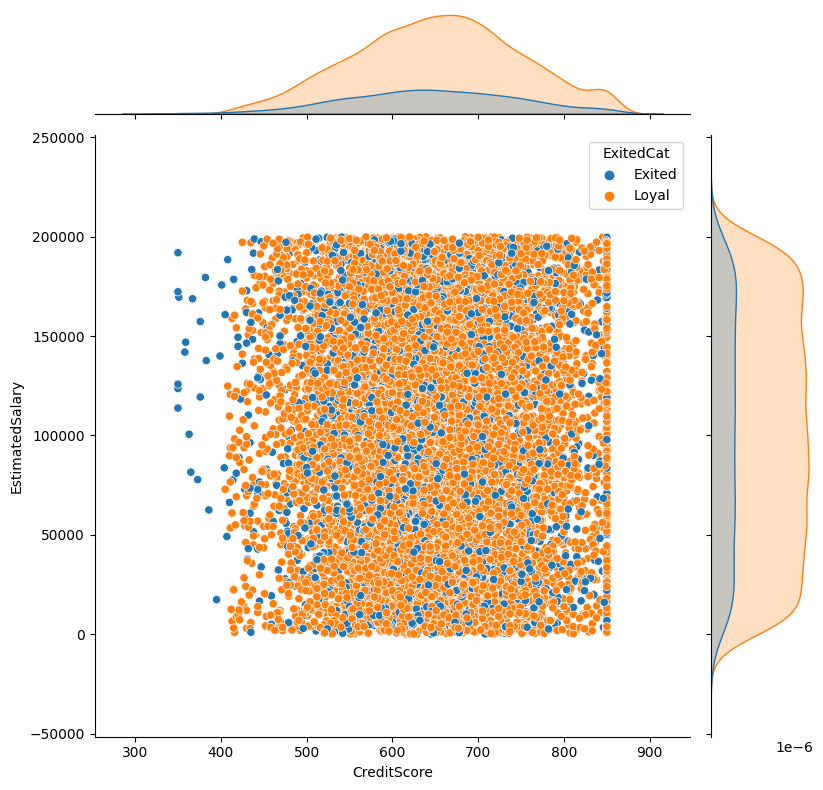

In [261]:
# Построим jointplot
jointplot = sns.jointplot(
    data=churn_cp, 
    x='CreditScore', 
    y='EstimatedSalary',
    hue='ExitedCat',
    height=8,
)

### Ответ
Явной взаимосвязи между признаками кредитного рейтинга и предполагаемой зарплаты не наблюдается.

## Задание 9.6
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

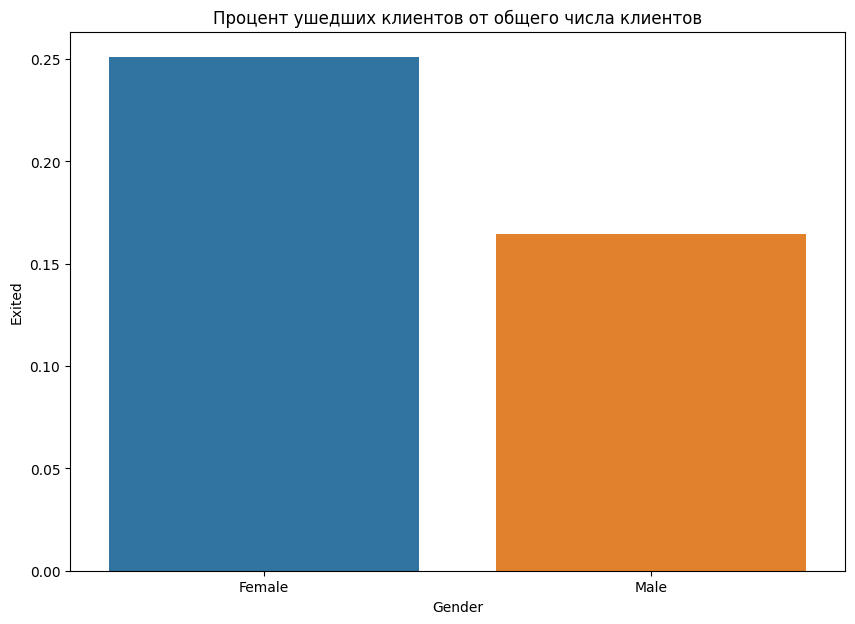

In [262]:
# Сгруппируем данные по гендеру и вычислим среднее по столбцу Exited
churn_gender_exited = churn_cp.groupby(by='Gender', as_index=False)['Exited'].mean()

#Построим столбчатую диаграмму
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=churn_gender_exited,
    x='Gender',
    orient='v',
    y='Exited'
   
)
barplot.set_title('Процент ушедших клиентов от общего числа клиентов');


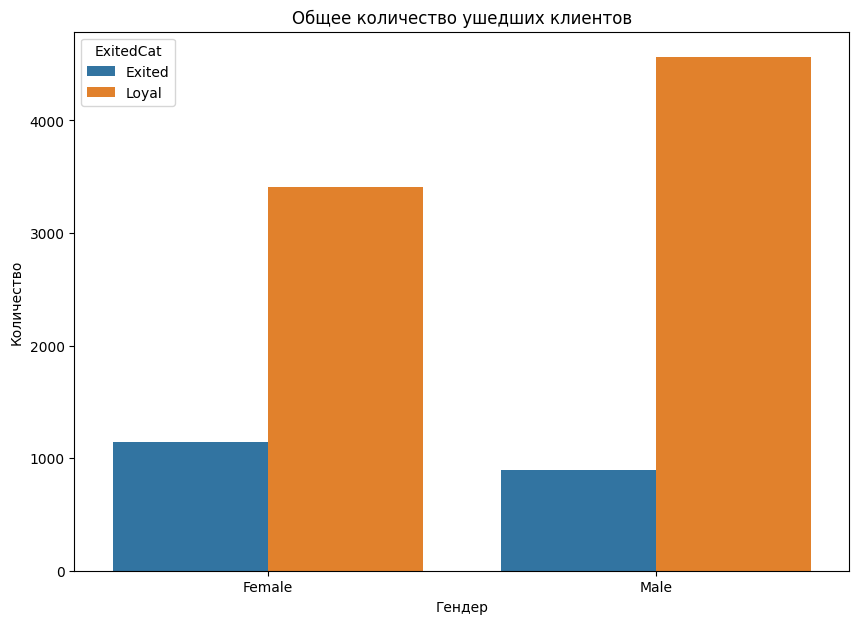

In [263]:
# 2-я версия графика в виде многоуровневой столбчатой диаграммы
churn_gender_exited2 = churn_cp.groupby(by=['Gender', 'ExitedCat'], as_index=False)['CustomerId'].count()


fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=churn_gender_exited2,
    x='Gender',
    orient='v',
    y='CustomerId',
    hue='ExitedCat'
   
)
barplot.set_title('Общее количество ушедших клиентов');
barplot.set_xlabel('Гендер');
barplot.set_ylabel('Количество');

### Ответ
Для иллюстрации столбчатая диаграмма, показывающая процент ушедших клиентов от общего числа клиентов в разрезе их гендера.
На диаграмме видно, что процент ушедших клиентов выше среди женщин.

## Задание 9.7
Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

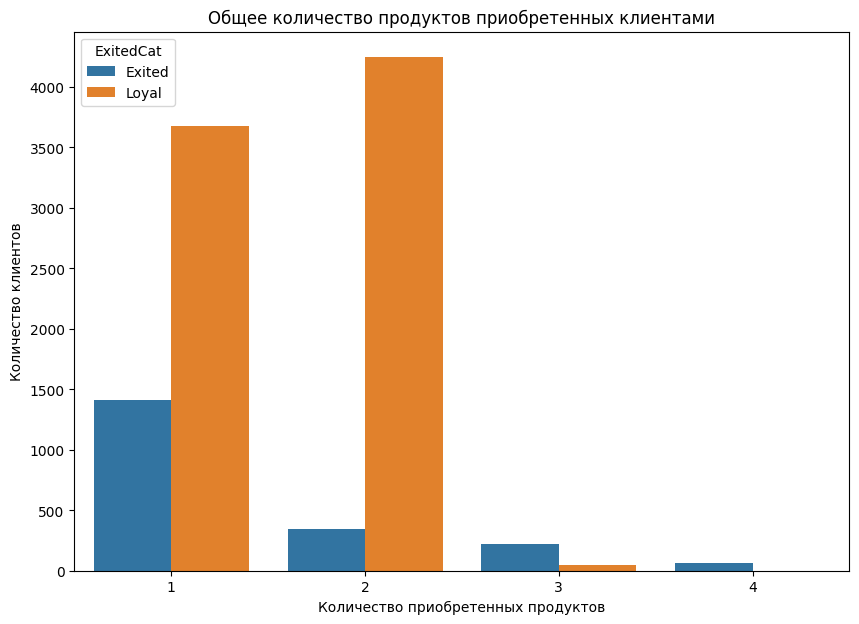

In [264]:
# Сгруппируем данные по числу приоберетенных услуг и категории лояльности.
churn_cp_product = churn_cp.groupby(by=['NumOfProducts', 'ExitedCat'], as_index=False).count()
fig = plt.figure(figsize=(10, 7))

barplot = sns.barplot(
    data=churn_cp_product,
    x='NumOfProducts',
    y='CustomerId', # для отображения количества берем один из столбцов
    hue='ExitedCat',
)
barplot.set_title('Общее количество продуктов приобретенных клиентами');
barplot.set_xlabel('Количество приобретенных продуктов');
barplot.set_ylabel('Количество клиентов');

### Ответ
Для демонстрации зависимости количества приобретенных продуктов от оттока клиентов мы построили многоуровневую столбчатую диаграмму.
Диаграмма наглядно показывает, что в основном среди клиентов, которые приобрели 3 или 4 продукта доля ушедших клиентов выше, чем лояльных. Тогда как преобладающее число лояльных клиентов приобретают 1 или 2 продукта.

## Задание 9.8
Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

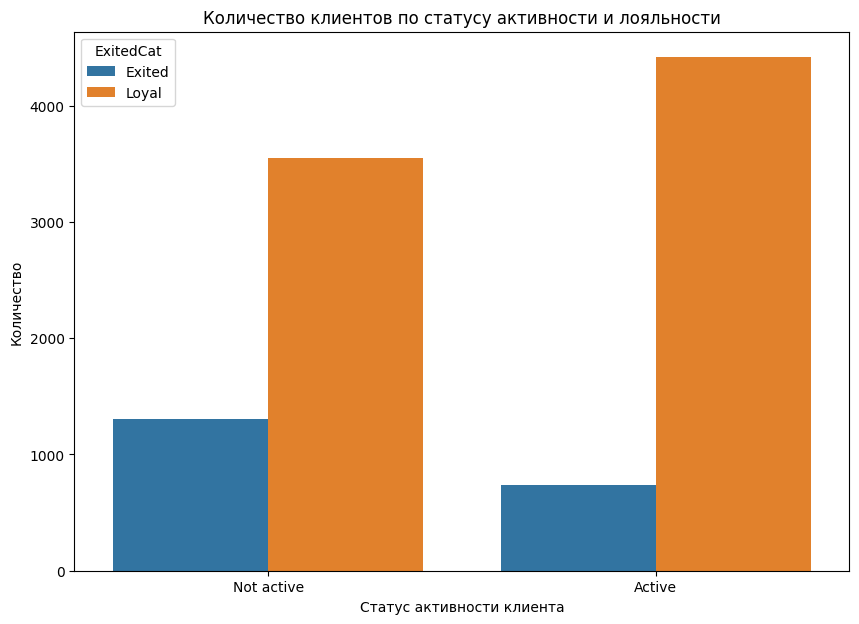

In [265]:
# Сгруппируем данные по признаку активного клиента и категории лояльности
churn_cp_active = churn_cp.groupby(by=['IsActiveMember', 'ExitedCat'], as_index=False).count()

# Преобразуем столбец с признаком активного клиента добавив читабельные статусы
churn_cp_active['IsActiveMember'] = churn_cp_active['IsActiveMember'].apply(lambda x: 'Active' if x == 1 else 'Not active')
fig = plt.figure(figsize=(10, 7))

# Построим столбчатую диаграмму
barplot = sns.barplot(
    data=churn_cp_active,
    x='IsActiveMember',
    y='CustomerId',
    hue='ExitedCat',
)
barplot.set_title('Количество клиентов по статусу активности и лояльности');
barplot.set_xlabel('Статус активности клиента');
barplot.set_ylabel('Количество');

### Ответ
Приведенная диаграмма показывает взаимосвязь статуса активного клиента и лояльности (оттока) клиентов.
На диаграмме видно, что среди активных клиентов, процент оттока клиентов меньше, чем среди неактивных клиентов. 
Исходя из этого можно предложить проанализировать возможные методы для повышения активности клиентов, что может положительно сказаться на их лояльности.

## Задание 9.9
В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [266]:
# Сгруппируем данных по географическому признаку
churn_country = churn_cp.groupby(by=['Geography'], as_index=False)['Exited'].mean()
import plotly
import plotly.express as px

#Построим график тепловой карты
fig = px.choropleth(
    data_frame=churn_country, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    range_color=[0, 1], #диапазон цвета
    title='Доля ушедших клиентов по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

# Отображаем график
fig.show()

### Ответ
На приведенной тепловой карте мира, демонстрирующей долю ушедших клиентов по странам, мы видим, что всего клиенты банка находятся в трех странах: Испания, Франция и Германия. 
При этом на Германию приходится максимальный процент ушедших клиентов - около 32%.
Возможно, в этой стране у банка появился конкурент, предлагающих клиентам более выгодные условия. Предлагается проанализировать детально какие услуги или процентные ставки предлагают другие банке на рынке в Германии и сравнить их с тем, что предоставляет сам банк.

## Задание 9.10
Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

### Решение

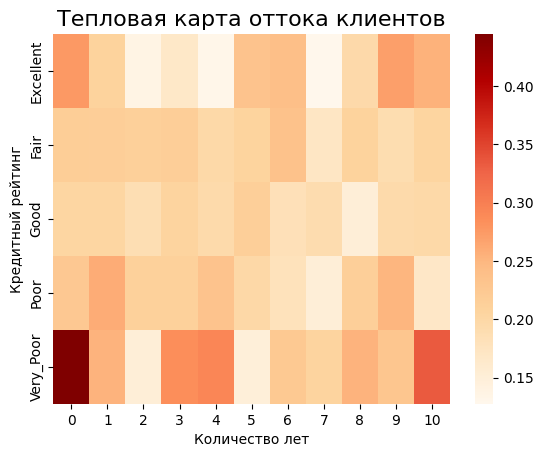

In [267]:
# Функция определения категории клиента в зависимости от его кредитного рейтинга
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

# Создаем новый столбец с категориями клиентов в зависимости от их кредитного рейтинга
churn_cp['CreditScoreCat'] = churn_cp['CreditScore'].apply(get_credit_score_cat)

# Строим сводную таблицу
churn_cp_pivot = churn_cp.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure'
       
)

# Приводим столбцы к строковому типу
churn_cp_pivot.columns = churn_cp_pivot.columns.astype('string')

# Строим тепловую карту
heatmap = sns.heatmap(data=churn_cp_pivot, cmap='OrRd')
heatmap.set_title('Тепловая карта оттока клиентов', fontsize=16);
heatmap.set_xlabel('Количество лет');
heatmap.set_ylabel('Кредитный рейтинг');

### Ответ
Приведенная тепловая карта оттока клиентов показывает зависимость доли ушедших клиентов от их кредитного рейтинга и количества лет, в течении которых клиент пользуется услугами банка.

На карте видно, что наибольшая доля ушедших клиентов приходится на клиентов с низким кредитным рейтингом (Very Poor). При чем чаще всего такие клиенту уходят в первый год пользования услугами банка.  Также среди данной категории клиентов наблюдается повышенная доля оттока среди тех, кто пользуется услучами банка 3, 4 и 10 лет.


На втором месте по доле оттока находится противоположная категория - клиенты с наивысшим рейтингом (Excellent).
Среди них максимальный отток приходится на первый год пользования услугами банка, а также на 9 и 10 года.

# FEEDBACK

Добрый день!

Отлично выполнена работа! Здорово, что попробовали большое кол-во разных графиков.
Большой плюс, что старались подписывать графики, это очень важно при создании отчётов и статей в реальных проектах.

Плюсы работы:
Работа с markdown, можно еще почитать https://paulradzkov.com/2014/markdown_cheatsheet/
Работа с библиотеками plotly.express, seaborn, matplotlib 
Библиотеки импортированы в начале работы
Хорошие выводы по заданиям
Подписаны графики
Добавлены комментарии
9.2 Отметили нормальное распределение
Здорово, что в 9.6, 9.7 и 9.8 добавили дополнительное разделение на лояльных и ушедших клиентов

Что можно улучшить и и полезные материалы:
В начале работы хорошо было бы добавить описание всех признаков.
9.3 Можно построить гистограмму распределения, на ней хорошо видно большое количество клиентов с нулевым балансом.
9.5 Интересно посмотреть зависимость от средней зп. 
9.10 Интересно посмотреть на ту же таблицу корреляции, но без клиентов с нулевым балансом.
Для улучшения визуализации и понятного чтения графиков, стоит добавлять название всех осей и легенд (не оставлять 0 и 1).
Работу можно представить через GitHub.
Для практики можно построить таблицу корреляции признаков с целевой переменной.
https://datastart.ru/blog/read/seaborn-heatmaps-13-sposobov-nastroit-vizualizaciyu-matricy-korrelyacii
https://habr.com/ru/post/558146/ 
В Jupyter notebook можно еще работать с языком LaTeX, для удобного оформления статей и красивого вывода формул:
https://habr.com/ru/company/ruvds/blog/574352/
https://habr.com/ru/post/279601/ 
Чтобы упростить задачу с PEP8 (стандарт написания кода), можно воспользоваться инструментами-помощниками:
https://habr.com/ru/company/dataart/blog/318776/
https://habr.com/ru/post/251531/
При работе с Jupyter notebook можно ускорить и упростить работу:
https://tproger.ru/translations/how-to-optimize-jupyter-notebook/ 


Отзыв приготовила ментор Белоглазова Ольга.
Если возникнут вопросы, можете обратиться в канал # 01_python_13 в Slack, постараемся на всё ответить и разобраться с моментами, которые вызывают трудности.
Удачи в обучении!


$P(A \mid B) = \frac{P(B \mid A)P(A)}{P(B)}$